<a href="https://colab.research.google.com/github/tomkart/stable-diffusion-colab/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: use a AI engine to do image to image with a simple drawing and make a real looking image

# Install necessary libraries
!pip install diffusers transformers accelerate scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
# Import libraries
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers import StableDiffusionPipeline
from PIL import Image
import requests


In [3]:
# prompt: use Stable diffusion text to image to generate a image

# Define the model ID
model_id = "CompVis/stable-diffusion-v1-4"  # Or another suitable model

# Use a GPU if available, otherwise use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16)
pipe = pipe.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

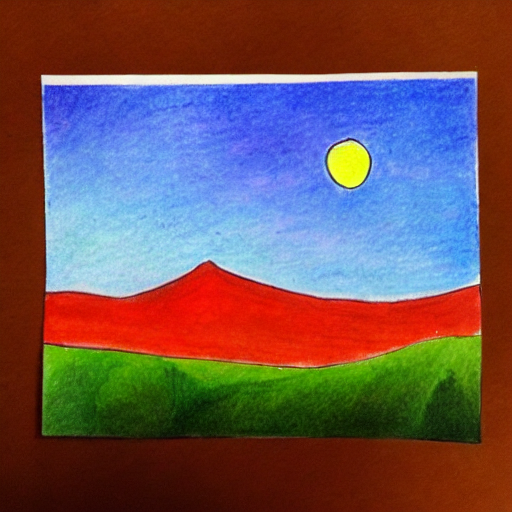

In [8]:
# Generate the image
prompt = "simple color drawing of a beautify landscape by a kid" #@param {type:"string"}
image = pipe(prompt).images[0]

# Display the generated image
display(image)
# Optionally save the image
image.save("kid_drawing.png")

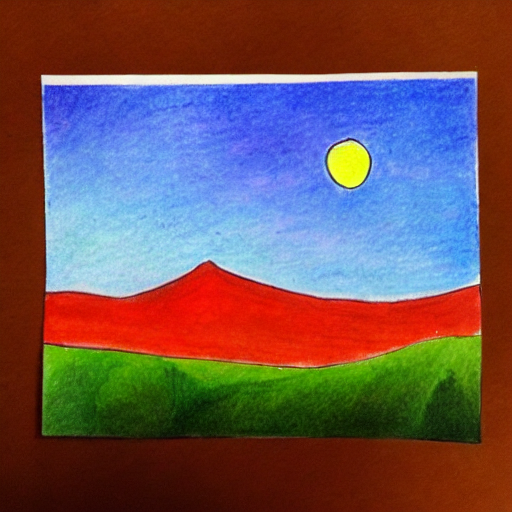

In [9]:
# Load your simple drawing (replace with your image path)
try:
  init_image = Image.open("kid_drawing.png").convert("RGB")
except FileNotFoundError:
  print("Error: image not found. Please upload your image file.")
  exit()

display(init_image)

In [10]:
pipe_i2i = StableDiffusionImg2ImgPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16)
pipe_i2i = pipe_i2i.to(device)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

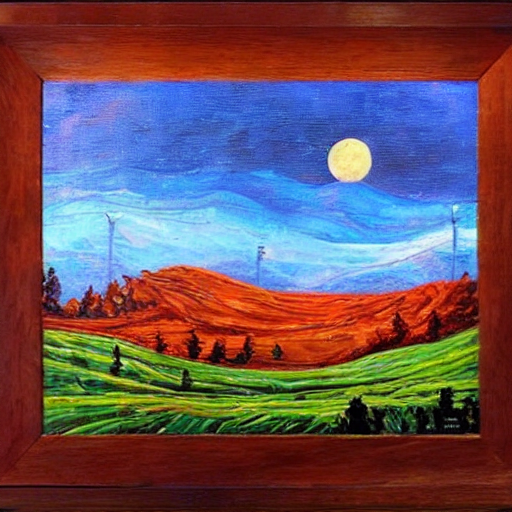

In [15]:
# Define the prompt (adjust as needed)
prompt = "beautify landscape, art masterpiece"

# Generate the image
image = pipe_i2i(prompt=prompt, image=init_image, strength=0.8, guidance_scale=8).images[0]

# Save the generated image
image.save("out_image.png")

# Display the generated image
display(image)